In [1]:
# Modules
import os
import csv

# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import calendar
import seaborn as sns
import matplotlib.ticker as mticker
sns.set(style="whitegrid")
# import matplotlib as mpl
# from matplotlib.ticker import MaxNLocator
# from collections import namedtuple
# %matplotlib inline

In [2]:
# Save path to data set in a variable
data_file = "trimmed_df_2.csv"

# Use Pandas to read data
arlington_county = pd.read_csv(data_file, parse_dates=[0], dayfirst=True)
# arlington_county.head()

In [3]:
# Reorganizing the columns using double brackets
organized_arlington = arlington_county[['FullStreetAddress', 'CityName', 'AssessmentYear', 'CloseDate', 'ClosePrice', 
                                        'ContractDate', 'CountyTax', 'DaysOnMarket', 'HOA', 'LandAssessmentAmount',
                                        'Stories', 'ListDate', 'ListPrice', 'ListingLowPrice', 'ListingType', 'ListingID', 
                                        'OriginalListPrice', 'Ownership', 'ShowDays', 'StreetName', 'StreetNumber', 
                                        'Style', 'TotalAssessment', 'TotalTaxes', 'Type', 'YearBuilt', 'PostalCode']]

organized_arlington.head()

,FullStreetAddress,CityName,AssessmentYear,CloseDate,ClosePrice,ContractDate,CountyTax,DaysOnMarket,HOA,LandAssessmentAmount,...,Ownership,ShowDays,StreetName,StreetNumber,Style,TotalAssessment,TotalTaxes,Type,YearBuilt,PostalCode
0,3601 5TH ST S #504,ARLINGTON,2014.0,2017-02-22,185000.0,2017-01-15,1872.62,688,False,36400.0,...,Condo,NaN,5TH,3601.0,Contemporary,190500,1897.38,Mid-Rise 5-8 Floors,1958,22204
1,1600 OAK ST #1915/1914,ARLINGTON,2015.0,2017-02-21,1700000.0,2016-11-16,NaN,514,True,122000.0,...,Condo,All Days,OAK,1600.0,Contemporary,1770000,17629.00,Hi-Rise 9+ Floors,1986,22209
2,1719 GREENBRIER ST,ARLINGTON,2015.0,2017-03-03,1625000.0,2017-01-08,7353.82,489,False,575000.0,...,Fee Simple,NaN,GREENBRIER,1719.0,Arts & Crafts,748100,7451.08,Detached,2016,22205
3,3723 FOUR MILE RUN DR,ARLINGTON,2015.0,2017-01-17,430000.0,2016-12-03,3361.86,121,False,190000.0,...,Fee Simple,All Days,FOUR MILE RUN,3723.0,Federal,342000,3406.32,Semi-Detached,1945,22206
4,2005 KEY BLVD #11579,ARLINGTON,2016.0,2017-04-07,362000.0,2017-03-06,3386.81,81,True,36600.0,...,Condo,NaN,KEY,2005.0,Rambler,346300,3431.80,Garden 1-4 Floors,1940,22201


In [4]:
# Filter the DataFrame down only to those columns to chart
closepricevsvolume = organized_arlington[["CloseDate","ClosePrice","ListPrice","TotalAssessment"]]

closepricevsvolume["TotalAssessment"] = closepricevsvolume["TotalAssessment"].astype('float')

closepricevsvolume.head()

C:\Users\mcsan\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,CloseDate,ClosePrice,ListPrice,TotalAssessment
0,2017-02-22,185000.0,192500.0,190500.0
1,2017-02-21,1700000.0,1850000.0,1770000.0
2,2017-03-03,1625000.0,1695000.0,748100.0
3,2017-01-17,430000.0,475000.0,342000.0
4,2017-04-07,362000.0,365000.0,346300.0


In [5]:
closepricevsvolume['CloseDate'] = closepricevsvolume['CloseDate'].astype('datetime64[ns]')

closepricevsvolume['CloseDate'] = closepricevsvolume['CloseDate'].apply(lambda x: x.strftime('%m'))

closepricevsvolume.head()

C:\Users\mcsan\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mcsan\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CloseDate,ClosePrice,ListPrice,TotalAssessment
0,02,185000.0,192500.0,190500.0
1,02,1700000.0,1850000.0,1770000.0
2,03,1625000.0,1695000.0,748100.0
3,01,430000.0,475000.0,342000.0
4,04,362000.0,365000.0,346300.0


In [6]:
df = closepricevsvolume.sort_values("CloseDate", ascending=True)

df.count()

CloseDate          3084
ClosePrice         3084
ListPrice          3084
TotalAssessment    3084
dtype: int64

In [7]:
groupedcp = df.groupby(["CloseDate"]).median()["ClosePrice"]
groupedcp

CloseDate
01    552450.0
02    542000.0
03    517500.0
04    625000.0
05    620000.0
06    630950.0
07    585000.0
08    545000.0
09    523300.0
10    599900.0
11    582000.0
12    575000.0
Name: ClosePrice, dtype: float64

In [8]:
groupedlp = df.groupby(["CloseDate"]).median()["ListPrice"]
groupedlp

CloseDate
01    549950.0
02    539900.0
03    529950.0
04    629800.0
05    624900.0
06    632400.0
07    589900.0
08    554900.0
09    529000.0
10    599900.0
11    595000.0
12    585000.0
Name: ListPrice, dtype: float64

In [9]:
groupedtv = df.groupby(["CloseDate"]).median()["TotalAssessment"]
groupedtv

CloseDate
01    424200.0
02    407700.0
03    428850.0
04    516500.0
05    521300.0
06    499200.0
07    449200.0
08    453000.0
09    446300.0
10    480300.0
11    472100.0
12    483300.0
Name: TotalAssessment, dtype: float64

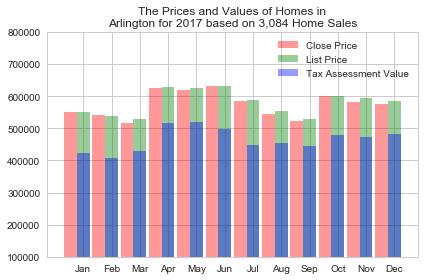

In [10]:
n_months = 12

m = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# cp = (552450, 542000, 517500, 625000, 620000, 630950, 585000, 545000, 523300, 599900, 582000, 575000)
cp = groupedcp = df.groupby(["CloseDate"]).median()["ClosePrice"]

# lp = (549950, 539900, 529950, 629800, 624900, 632400, 589900, 554900, 529000, 599900, 595000, 585000)
lp = groupedlp = df.groupby(["CloseDate"]).median()["ListPrice"]

# tv = (424200, 407700, 428850, 516500, 521300, 499200, 449200, 453000, 446300, 480300, 472100, 483300)
tv = groupedtv = df.groupby(["CloseDate"]).median()["TotalAssessment"]

fig, ax = plt.subplots()

index = np.arange(n_months)
bar_width = 0.45

opacity = 0.4
error_config = {'ecolor': '0.4'}

rects1 = ax.bar(index, cp, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='Close Price')

rects2 = ax.bar(index + bar_width, lp, bar_width,
                alpha=opacity, color='g',
                error_kw=error_config,
                label='List Price')

rects3 = ax.bar(index + bar_width, tv, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='Tax Assessment Value')


# ax.set_xlabel('Months')
# ax.set_ylabel('Prices (USD)')
ax.set_title('The Prices and Values of Homes in\nArlington for 2017 based on 3,084 Home Sales')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.ylim(100000, 800000)
ax.legend()

plt.savefig("CloseListTAV.png")

fig.tight_layout()
plt.show()